In [21]:
import pandas as pd
import seaborn as sns

salary_df = pd.read_excel('./salary_data_states.xlsx')
salary_df.head()

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,PREVAILING_WAGE_SUBMITTED,PREVAILING_WAGE_SUBMITTED_UNIT,PAID_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED_UNIT,JOB_TITLE,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
0,I-200-14073-248840,denied,3/14/2014,3/21/2014,"ADVANCED TECHNOLOGY GROUP USA, INC.",6217100.0,year,62171.0,year,SOFTWARE ENGINEER,...,"Software Developers, Applications",Illinois,IL,NaN,y,H-1B,NaN,62171.0,software engineer,1
1,A-15061-55212,denied,3/19/2015,3/19/2015,SAN FRANCISCO STATE UNIVERSITY,5067600.0,year,91440.0,year,Assistant Professor of Marketing,...,"Business Teachers, Postsecondary",California,CA,94132.0,NaN,greencard,NaN,91440.0,assistant professor,2
2,I-200-13256-001092,denied,9/13/2013,9/23/2013,CAROUSEL SCHOOL,4947000.0,year,49470.0,year,SPECIAL EDUCATION TEACHER,...,"Special Education Teachers, Kindergarten and E...",California,CA,NaN,y,H-1B,NaN,49470.0,teacher,3
3,I-200-14087-353657,denied,3/28/2014,4/7/2014,HARLINGEN CONSOLIDATED INDEPENDENT SCHOOL DIST...,251052.0,month,43800.0,year,SCIENCE TEACHER,...,"Biological Science Teachers, Postsecondary",Texas,TX,NaN,y,H-1B,NaN,43800.0,teacher,4
4,I-203-14259-128844,denied,9/16/2014,9/23/2014,SIGNAL SCIENCES CORPORATION,84573.0,bi-weekly,170000.0,year,SENIOR SOFTWARE ENGINEER,...,"Software Developers, Systems Software",Oregon,OR,NaN,y,E-3 Australian,NaN,170000.0,software engineer,5


In [22]:
salary_df.describe()

,PREVAILING_WAGE_SUBMITTED,PAID_WAGE_SUBMITTED,EXPERIENCE_REQUIRED_NUM_MONTHS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,order
count,1.672780e+05,1.672780e+05,4965.000000,167210.000000,1.672780e+05,167278.000000
mean,7.115752e+04,8.164186e+04,34.692044,74274.868236,8.553277e+04,83714.716305
std,3.874624e+04,4.147703e+04,22.317783,25356.245893,3.873847e+04,48300.236431
min,5.050000e+00,5.050000e+00,0.000000,10504.000000,1.050000e+04,1.000000
25%,5.447500e+04,6.100000e+04,12.000000,56880.000000,6.300000e+04,41901.250000
50%,6.970100e+04,7.700000e+04,24.000000,70928.000000,7.860000e+04,83722.500000
75%,8.993700e+04,1.000000e+05,60.000000,90459.000000,1.000060e+05,125541.750000
max,6.217100e+06,2.500000e+06,144.000000,320000.000000,2.500000e+06,167361.000000


## I. Do specific sub-types of data-related jobs have higher or lower salaries than others ?

In [23]:
avg_wage_by_subtype = salary_df.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)
avg_wage_by_subtype

JOB_TITLE_SUBGROUP
attorney                 146413.596714
management consultant    108251.334662
data scientist           108021.038248
assistant professor       94876.713707
software engineer         92505.303013
business analyst          71300.079566
data analyst              70030.078688
teacher                   46039.985507
Name: PAID_WAGE_PER_YEAR, dtype: float64

### 1a - Which companies have the highest salries for those subtypes ?

In [24]:
highest_paid_companies = salary_df.groupby(['JOB_TITLE_SUBGROUP', 'EMPLOYER_NAME'])['PAID_WAGE_PER_YEAR'].mean().reset_index()
top_companies_per_subgroup = highest_paid_companies.loc[highest_paid_companies.groupby('JOB_TITLE_SUBGROUP')['PAID_WAGE_PER_YEAR'].idxmax()].sort_values(by='PAID_WAGE_PER_YEAR', ascending=False)
top_companies_per_subgroup

,JOB_TITLE_SUBGROUP,EMPLOYER_NAME,PAID_WAGE_PER_YEAR
1805,attorney,HUGHES HUBBARD & REED LLP,2400000.0
7771,business analyst,THE UNIVERSITY OF TEXAS SYSTEM ADMINISTRATION,677508.0
20874,software engineer,"SIGMATEK SYSTEMS, LLC",600000.0
10680,management consultant,"CO-CREATION PARTNERS, INC.",582400.0
23830,teacher,AUTISTIC TREATMENT CENTER A/K/A AUTISM TREATME...,542400.0
285,assistant professor,DIXIE STATE COLLEGE OF UTAH,492250.0
9200,data analyst,INTUIT,433161.5
10411,data scientist,NETFLIX,220000.0


### 1b - Changes with location of the job ?

In [25]:
avg_wage_by_state_subgroup = salary_df.groupby(['WORK_STATE', 'JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean().unstack().fillna(0)
avg_wage_by_state_subgroup['data scientist'].sort_values(ascending=False).head()

WORK_STATE
California    117824.161492
Washington    116132.606905
Minnesota     111457.000000
New York      106332.276119
Oregon        106140.850000
Name: data scientist, dtype: float64

### 1c - Will the answer change if I take the standard of living into account ?

Yes, the answer would change if you were to take the standard of living into account as California is one of the most expensive states to live in compared to Minnesota which is generally a less expensive state to live in.

## V. What specific sub-types require higher experience and education, is this correlated with salary ?

### ID'ing sub-types with higher experience requirements 

In [26]:
experience_by_subtype = salary_df.groupby('JOB_TITLE_SUBGROUP')['EXPERIENCE_REQUIRED_NUM_MONTHS'].mean().sort_values(ascending=False)
print("Average Experience Required by Job Subgroup:")
print(experience_by_subtype)

Average Experience Required by Job Subgroup:
JOB_TITLE_SUBGROUP
management consultant    37.285714
software engineer        36.145297
data analyst             33.703125
teacher                  30.857143
business analyst         30.608614
attorney                 26.078947
data scientist           22.125000
assistant professor      15.572519
Name: EXPERIENCE_REQUIRED_NUM_MONTHS, dtype: float64


This output shows the average experience (in months) required for each job title subgroup:

Management Consultant requires the highest average experience (37.29 months), followed closely by Software Engineer (36.15 months).
Data Analyst and Teacher also have relatively high experience requirements at around 33 to 30 months.

Business Analyst, Attorney, and Data Scientist have lower experience requirements, ranging from 22 to 26 months.
Assistant Professor requires the least average experience at around 15.57 months.

This ranking tells us which job subgroups have the highest demand for experienced candidates. Roles like Management Consultant and Software Engineer typically involve complex tasks that may require substantial prior experience.

### ID'ing sub-types with higher education requirements

In [27]:
education_by_subtype = salary_df.groupby('JOB_TITLE_SUBGROUP')['EDUCATION_LEVEL_REQUIRED'].value_counts().unstack().fillna(0)
print("\nEducation Level Distribution by Job Subgroup:")
print(education_by_subtype)


Education Level Distribution by Job Subgroup:
EDUCATION_LEVEL_REQUIRED  Associate's  Bachelor's  Doctorate  High School  \
JOB_TITLE_SUBGROUP                                                          
assistant professor               0.0         0.0     1078.0          0.0   
attorney                          0.0         1.0        4.0          0.0   
business analyst                  3.0       360.0        2.0          1.0   
data analyst                      0.0        49.0        0.0          0.0   
data scientist                    0.0         6.0        9.0          0.0   
management consultant             0.0         6.0        1.0          1.0   
software engineer                17.0      2932.0       82.0          1.0   
teacher                           1.0       584.0        5.0          4.0   

EDUCATION_LEVEL_REQUIRED  Master's  Other  
JOB_TITLE_SUBGROUP                         
assistant professor           62.0  214.0  
attorney                       9.0   60.0  
busine

This part provides a detailed distribution of educational requirements for each job title subgroup:

Assistant Professor: Mostly requires a Doctorate degree (1078 positions), with very few needing a Master's (214).

Attorney: Typically requires Master's (9 positions) or Doctorate (4), consistent with the qualifications needed for legal professions.

Software Engineer: Primarily requires a Bachelor's (2992 positions) or Master's (4809), while Doctorate is relatively rare.

Data Scientist: Has a mix of requirements but generally requires a Master's (38 positions) or a Doctorate (2).

Business Analyst and Management Consultant: Both roles mainly require Bachelor's and Master's degrees.

Teacher: Requires mostly Bachelor's and some Master's degrees.

This analysis shows that academic roles (e.g., Assistant Professor) generally require more advanced degrees compared to corporate roles like Software Engineer or Data Analyst.

### Correlation Analysis

In [28]:
education_mapping = {
    'None': 0,
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}
salary_df['EDUCATION_LEVEL_REQUIRED_NUM'] = salary_df['EDUCATION_LEVEL_REQUIRED'].map(education_mapping)

correlation_matrix = salary_df[['EXPERIENCE_REQUIRED_NUM_MONTHS', 'EDUCATION_LEVEL_REQUIRED_NUM', 'PAID_WAGE_PER_YEAR']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                EXPERIENCE_REQUIRED_NUM_MONTHS  \
EXPERIENCE_REQUIRED_NUM_MONTHS                        1.000000   
EDUCATION_LEVEL_REQUIRED_NUM                         -0.237354   
PAID_WAGE_PER_YEAR                                    0.385180   

                                EDUCATION_LEVEL_REQUIRED_NUM  \
EXPERIENCE_REQUIRED_NUM_MONTHS                     -0.237354   
EDUCATION_LEVEL_REQUIRED_NUM                        1.000000   
PAID_WAGE_PER_YEAR                                  0.052946   

                                PAID_WAGE_PER_YEAR  
EXPERIENCE_REQUIRED_NUM_MONTHS            0.385180  
EDUCATION_LEVEL_REQUIRED_NUM              0.052946  
PAID_WAGE_PER_YEAR                        1.000000  


This analysis looks at the relationships between experience, education, and salary:

Correlation Matrix
Experience and Salary (0.39): There is a moderate positive correlation between the number of months of experience required and salary. This indicates that jobs requiring more experience tend to offer higher salaries, but it is not a strong correlation

Education Level and Salary (0.053): There is a very weak positive correlation between education level and salary. This means that requiring higher education doesn't significantly affect the salary offered.

Experience and Education (-0.237): There is a weak negative correlation between experience and education level. This suggests that as the education requirements increase, the experience requirements tend to decrease slightly. This might mean that employers consider advanced degrees as a substitute for experience.

### Visualizing correlation w/ heatmap

AttributeError: module 'matplotlib' has no attribute 'title'

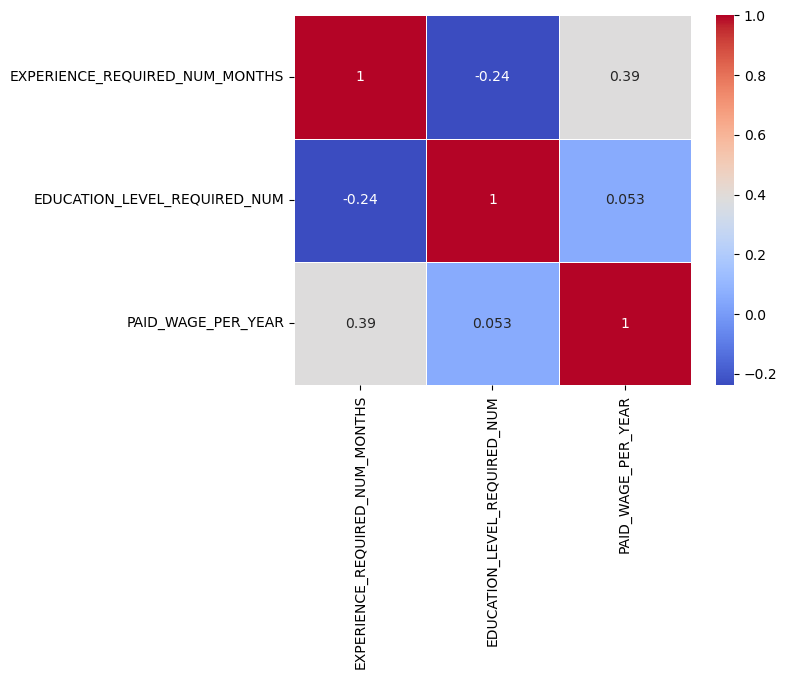

In [29]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Experience, Education, and Salary')
plt.show()

The heatmap visualization helps to easily see the strength and direction of correlations:

Experience vs. Salary: The moderate positive correlation is represented by a lighter color, showing a noticeable but not very strong relationship.

Education vs. Salary: The very weak positive correlation is nearly negligible, indicating that higher education requirements do not correlate strongly with increased salaries.

Experience vs. Education: The negative correlation is visually represented by a darker blue, indicating an inverse relationship, albeit not very strong.

### Summary

Experience Requirements: Roles like Management Consultant and Software Engineer tend to require higher experience levels, which moderately correlates with higher salary.

Education Requirements: Positions like Assistant Professor require advanced degrees (doctorates), while most technical and corporate roles (e.g., Software Engineer, Data Scientist) are more focused on Bachelor's and Master's degrees.

Correlation Observations:

Experience has a moderate positive effect on salary, suggesting that employers value experience for higher compensation.
Education has a minimal effect on salary, implying that higher degrees do not guarantee significantly higher pay.
Experience vs. Education shows a weak negative correlation, indicating a slight trade-off between the two; higher education might be considered a replacement for work experience in some cases.